In [5]:
from prophet import Prophet # https://facebook.github.io/prophet/docs/quick_start.html#python-api
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot

df = pd.read_csv('../data/processed/merged_clean.csv', usecols=['date','total_sales', 'oil_price_daily'])
df = df.groupby('date').agg({
    'total_sales': 'sum', 
    'oil_price_daily': 'first',
}).reset_index()

# Prepare the data for Prophet
df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['total_sales']

last_date = df['ds'].iloc[-1]

# Initialize Prophet model
m = Prophet()
m_h = Prophet()

m_h.add_country_holidays(country_name='IN')

# Fit the model
m.fit(df)
m_h.fit(df)

# Make a dataframe for future dates
future_dates = m.make_future_dataframe(periods=356)  
future_dates_h = m_h.make_future_dataframe(periods=356) 

# Make predictions
forecast = m.predict(future_dates)
forecast_h = m_h.predict(future_dates_h)

C:\Users\Cursist\AppData\Roaming\Python\Python311\site-packages\holidays\countries\india.py:99: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
12:26:09 - cmdstanpy - INFO - Chain [1] start processing
12:26:09 - cmdstanpy - INFO - Chain [1] done processing
12:26:10 - cmdstanpy - INFO - Chain [1] start processing
12:26:10 - cmdstanpy - INFO - Chain [1] done processing


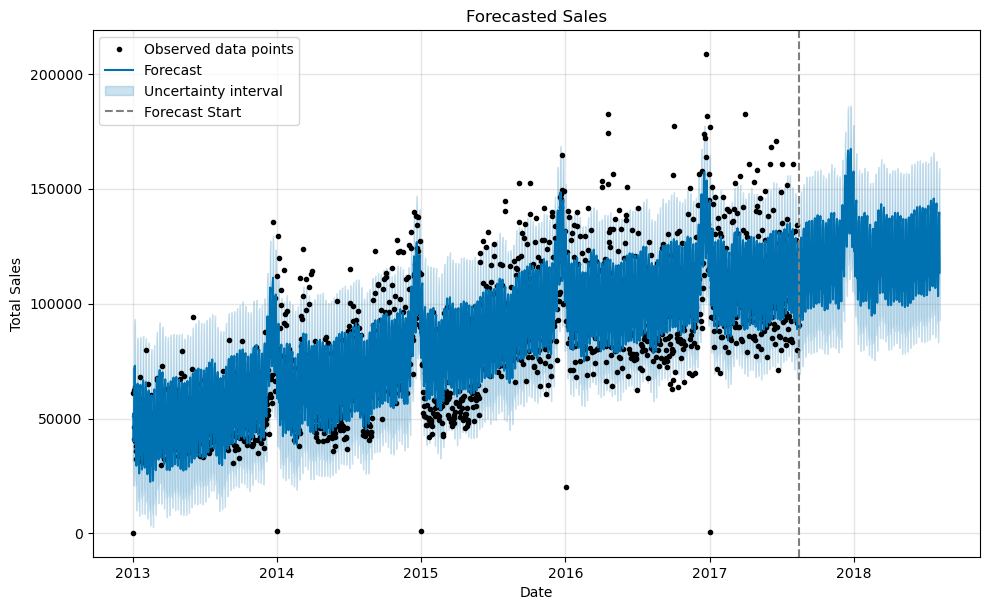

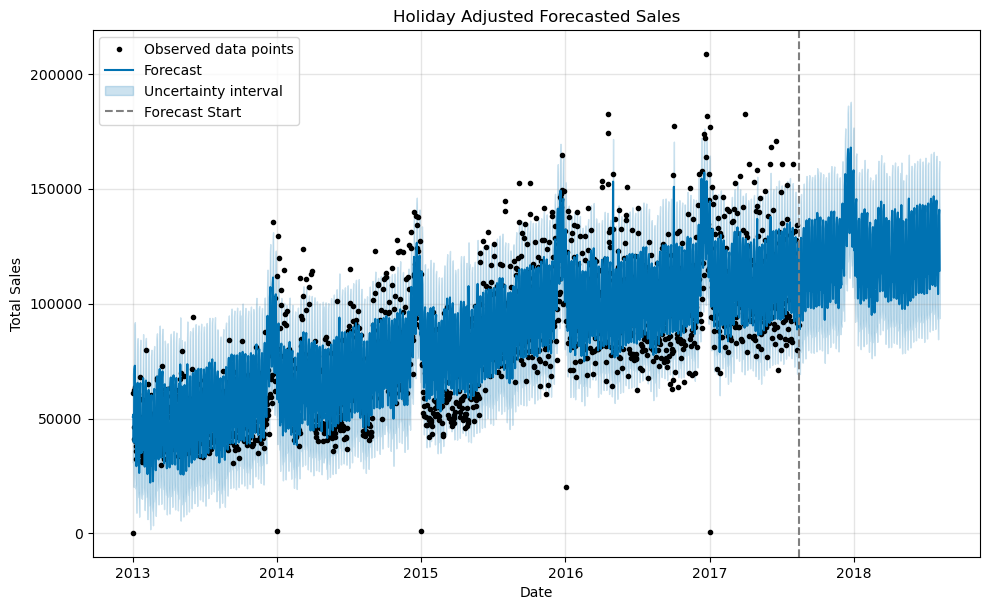

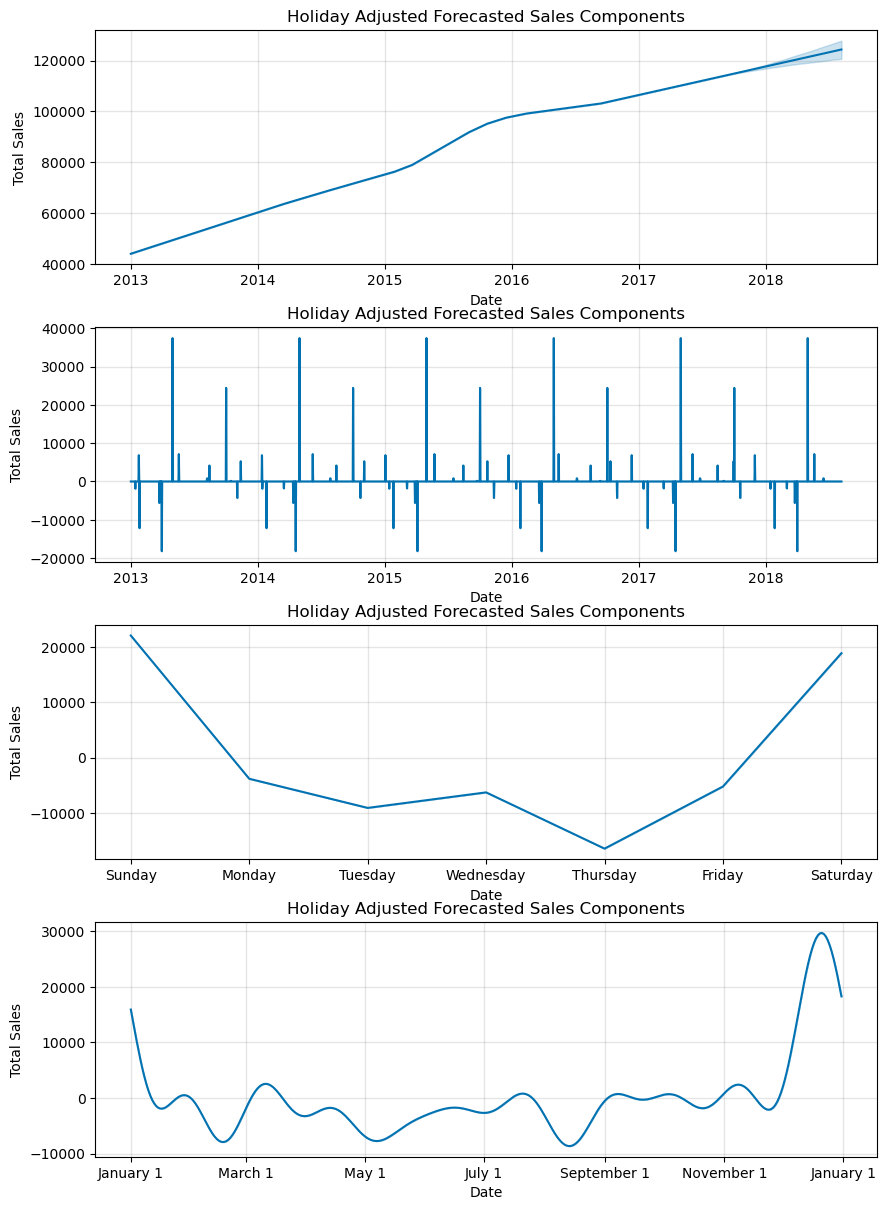

In [6]:
# Plot the forecast
fig = m.plot(forecast)
figh = m_h.plot(forecast_h)
figch = m_h.plot_components(forecast_h)


# Plot a vertical line indicating where the forecast starts
forecast_start_date = last_date
for ax in fig.axes:
    ax.axvline(x=forecast_start_date, color='gray', linestyle='--', label='Forecast Start')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.set_title('Forecasted Sales')
    ax.legend()

for ax in figh.axes:
    ax.axvline(x=forecast_start_date, color='gray', linestyle='--', label='Forecast Start')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.set_title('Holiday Adjusted Forecasted Sales')
    ax.legend()


for ax in figch.axes:
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.set_title('Holiday Adjusted Forecasted Sales Components')


In [ ]:
plot_plotly(m_h, forecast_h)

In [ ]:
plot_components_plotly(m_h, forecast_h)

## Our holidays

12:30:31 - cmdstanpy - INFO - Chain [1] start processing
12:30:32 - cmdstanpy - INFO - Chain [1] done processing


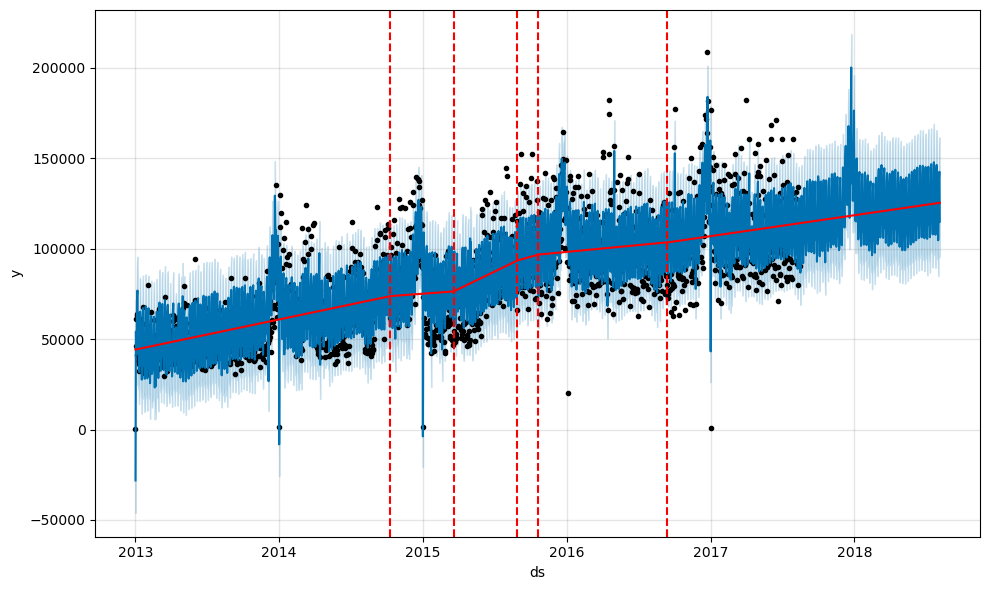

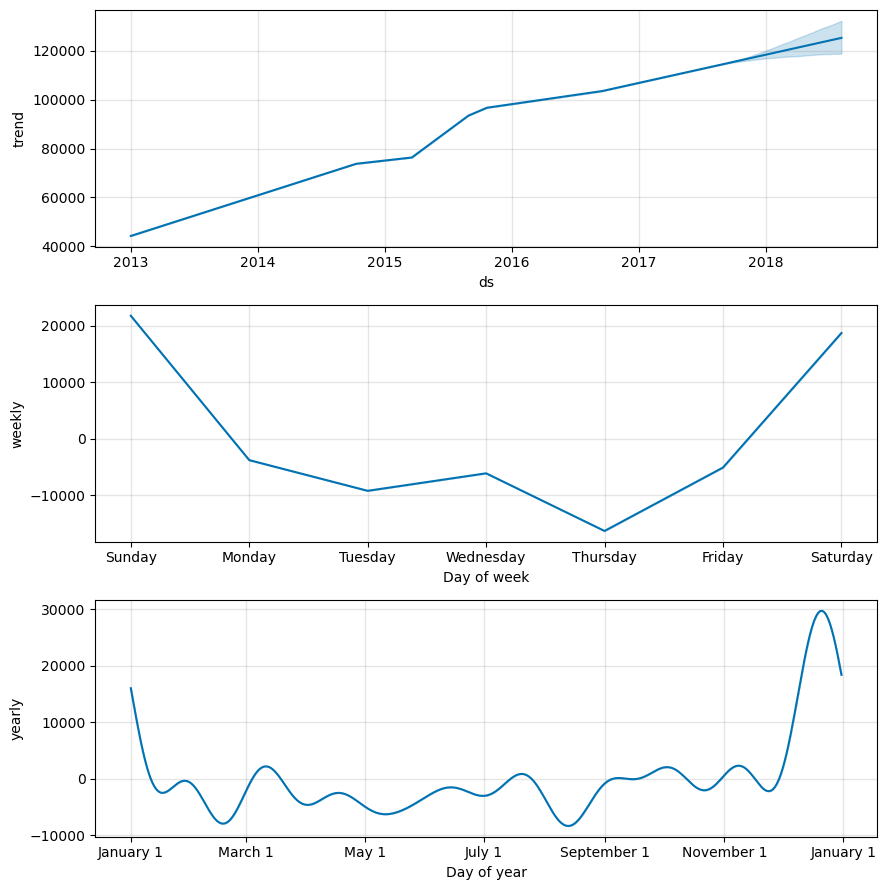

In [13]:


# Prepare the data for Prophet
df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['total_sales']

last_date = df['ds'].iloc[-1]

df_holidays = pd.read_csv('../data/processed/holidays_india_clean.csv', usecols=['date','description'])
df_holidays.rename(columns={'date': 'ds', 'description':'holiday'}, inplace=True)
model = Prophet(holidays=df_holidays)
model.fit(df)

# Make a dataframe for future dates
future_dates = model.make_future_dataframe(periods=356)  # Predicting next 30 days


# Make predictions
forecast = model.predict(future_dates)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
figch = m.plot_components(forecast)

13:04:42 - cmdstanpy - INFO - Chain [1] start processing
13:04:43 - cmdstanpy - INFO - Chain [1] done processing


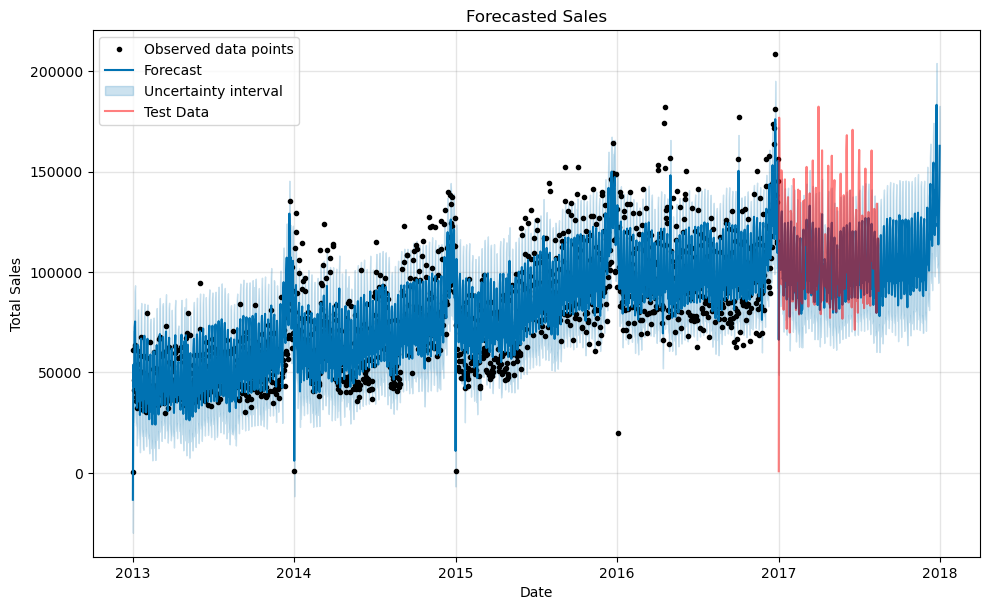

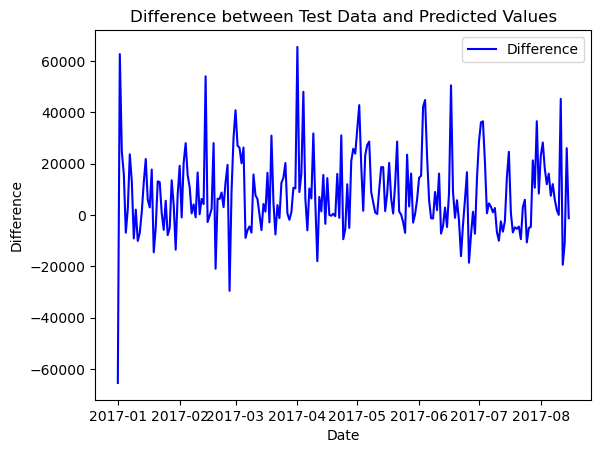

In [14]:
train_df = df[df['ds'] < '2017-01-01']
test_df = df[df['ds'] >= '2017-01-01']

# Create and fit the model using training data
model = Prophet(holidays=df_holidays)
model.fit(train_df)

# Make predictions for future dates
future_dates = model.make_future_dataframe(periods=365)  # Predicting next 365 days
forecast = model.predict(future_dates)

# Plotting the forecast, training data, and testing data
fig = model.plot(forecast)

# Plot the test data
plt.plot(test_df['ds'], test_df['y'], color='red', label='Test Data', alpha=0.5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Forecasted Sales')

# Add legend
plt.legend()

# Show plot
plt.show()

# Calculate the difference between test data and predicted values
test_predicted_diff = test_df['y'] - forecast.loc[forecast['ds'].isin(test_df['ds']), 'yhat']

# Plot the difference on a new figure
plt.figure()
plt.plot(test_df['ds'], test_predicted_diff, color='blue', label='Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Difference between Test Data and Predicted Values')
plt.legend()
plt.show()